OBIETTIVO--> massimizzazione del guadagno informativo.
Il guadagno informativo è la differenza fra l'impurità del nodo genitore e la somma delle impurità del 
nodo figlio.--> più basse sono le impurità dei nodi figli, maggiore è il guadagno informativo.
MISURE DI IMPURITA':

IMPURITA' DI GINI:criterio per minimizzare la probabilità di un'errata di classificazione,
                  mi aspetto che ad un certo punto sia puro  e quindi G=0


ENTROPIA:tenta di massimizzare la distribuzione delle informazioni dell'albero.
e=0 se tutti gli esempi del nodo appartengono alla stessa classe
e=1 se le classi sono distribuite uniformemente
    

ERRORE DI CLASSIFICAZIONE: criterio utile per la potatura, ma non per far crescere un albero decisionale
    


# COSTRUZIONE DI UN ALBERO DECISIONALE

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

iris=datasets.load_iris()
list(iris)

X=iris.data[:,[2,3]]
y=iris.target
print("Class label:",np.unique(y))

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3,random_state=1,stratify=y)


Class label: [0 1 2]


In [10]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(criterion="gini",
                                 max_depth=4,
                                 random_state=1)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

C:\Users\ssanti\AppData\Local\Temp\ipykernel_17464\3114170517.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


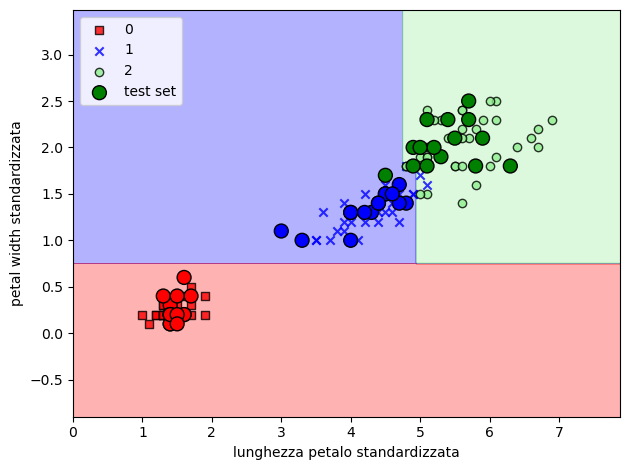

In [11]:
#visualizziamo i risultati
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
#plottiamo tutti gli esempi
    if test_idx:
        X_test,y_test=X[test_idx,:],y[test_idx] #sto definendo i miei dataset di training e test
        #creo dataframe,in x_test ho due colonne che ho separato X_test_0 X_test_1
        #la mia terza colonna è la y_test
        df = pd.DataFrame(dict(X_test_0=X_test[:,0],X_test_1=X_test[:,1], y_test=y_test))
        #creo un dizionario di colori
        colori = {0:'red', 2:'green', 1:'blue'}
        
        
        plt.scatter(df["X_test_0"],df["X_test_1"],
                    c=df["y_test"].map(colori),edgecolor="black",alpha=1.0,
                    linewidth=1,marker="o",
                    s=100,label="test set")
    
X_combinated=np.vstack((X_train,X_test))
y_combined=np.hstack((y_train,y_test))

plot_decision_regions(X=X_combinated,
                    y=y_combined,
                    classifier=tree_model,
                    test_idx=range(105,150))

plt.xlabel("lunghezza petalo standardizzata")
plt.ylabel("petal width standardizzata")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

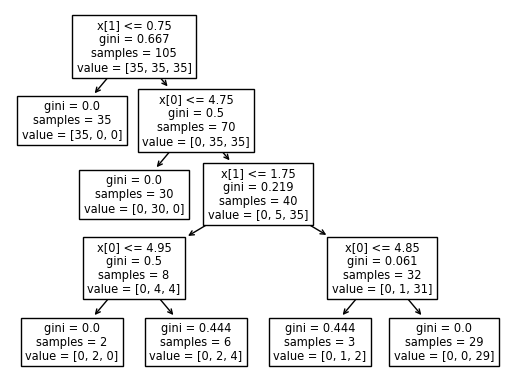

In [12]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()